In [42]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [43]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 144

Оригинал: `oktoih.md` [ссылка](https://gitlab.com/dh_csl_corpus/csl-parallel-corpus/-/blob/master/%D0%A1%D0%BB%D0%B0%D0%B2%D1%8F%D0%BD%D1%81%D0%BA%D0%B8%D0%B5%20%D0%B1%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D1%8B/%D0%A2%D0%B5%D0%BA%D1%81%D1%82%D1%8B%20%D1%81%20%D0%BA%D0%B8%D0%BD%D0%BE%D0%B2%D0%B0%D1%80%D1%8C%D1%8E/%D0%98%D0%B7%20%D1%87%D0%B5%D0%B3%D0%BE%20%D1%81%D0%BE%D0%B1%D0%B8%D1%80%D0%B0%D0%B5%D0%BC%20%D0%BA%D0%BE%D1%80%D0%BF%D1%83%D1%81/oktoih.md)

Временный результат для демонстрации: `oktoih_sample.md`

Итоговый результат: `oktoih_clean.md`

In [44]:
file = 'oktoih_clean.md'
output = 'oktoih_clean.md'

-----

In [4]:
with open(file, 'r') as o:
    r = o.read()
    
len(r)

2067037

In [66]:
test = r[:50000]

In [5]:
# ищем строки, которые начинаются с '=', и складываем их в список заголовков
headers = re.findall('\n?=+[^=].*\n', r)

print('Количество заголовков: ' + str(len(headers)))

Количество заголовков: 1227


In [6]:
for i in headers[:5]:
    print(i)

= Уставные главы

== Чин малыя вечерни


== Чин великия вечерни, сиесть бдения всенощнаго, и утрени воскресныя


== О святем имущем бдение, аще прилучится в неделю


== О святем имущем полиелей, аще прилучится в неделю



In [7]:
# вложенность заголовков определяется по количеству = в начале строки
maxlevel = len(max([h.split()[0] for h in headers], key=len))
print('Вложенность заголовков:', maxlevel)

Вложенность заголовков: 4


-----

# Сбор информации о строках

In [70]:
# читаем построчно
with open(file, 'r') as l:
    l = l.readlines()
    
print(len(l))

14764


In [71]:
plist = [] # список словарей всех каждой строки

for i,line in enumerate(l):
    id = i # id равен порядковому номеру в пронумерованном списке
    if line.startswith('='):
        level = len(line.split()[0]) # уровень равен количеству '=' перед первым пробелом
        red = None # наличие киновари (в заголовках ее нет)
        line = line.replace('=','') # очищаем текст от '='
        isHeader = True # помечаем заголовки
    else:
        level = maxlevel + 1 # уровень обычного абзаца = максимальная вложенность заголовков + 1
        isHeader = False
        if '<' in line:
            red = True # наличие киновари
        else:
            red = False # наличие киновари 
            
    line = line.strip() # убираем лишние пробелы по бокам
    plist.append({'id':id, 'level':level, 'hasRed':red, 'isHeader': isHeader, 'line':line})

df = pd.DataFrame(plist) # кладем в датафрейм для просмотра

In [72]:
df[:20] # hasRed - наличие киновари, isHeader - является ли заголовком

id  level hasRed  isHeader  \
0    0      1   None      True   
1    1      2   None      True   
2    2      5  False     False   
3    3      5  False     False   
4    4      5  False     False   
5    5      5   True     False   
6    6      5  False     False   
7    7      5   True     False   
8    8      5  False     False   
9    9      5   True     False   
10  10      5  False     False   
11  11      5   True     False   
12  12      5  False     False   
13  13      5  False     False   
14  14      5   True     False   
15  15      5   True     False   
16  16      5   True     False   
17  17      5   True     False   
18  18      5   True     False   
19  19      5  False     False   

                                                 line  
0                                      Уставные главы  
1                                   Чин малыя вечерни  
2   Прежде солнечнаго захождения дне субботнаго, п...  
3   И собравшимся братиям в притвор, творит священ...  
4   И учиненный чтец глаголет: Слава тебе Боже наш...  
5    <Таже>, Царю Небесный: Трисвятое: И по Отче наш:  
6   Возглас от священника, и чтет чтец 9-й час по ...  
7   <Таже>, по конце того и по отпусте входим в хр...  
8   Аще же 9-й час глаголется в храме, тогда отпус...  
9   И чтец глаголет: Приидите поклонимся: трижды, ...  
10  Иерей же ектении не глаголет, но чтец глаголет...  
11                                   <Слава, и ныне>:  
12                           И абие, Господи воззвах:  
13  И ставим стихи 4. И поем стихиры воскресны гла...  
14                      <Слава, и ныне>, Богородичен.  
15                               <Таже>, Свете тихий:  
16                      <Прокимен>, Господь воцарися:  
17  <Стих:> Облечеся Господь в силу и препоясася. ...  
18               <Таже>, Сподоби Господи в вечер сей:  
19  И абие поем стиховны стихиру едину воскресну. ...

In [100]:
# фильтрация по уровню
lvl = 4 # тут ставится нужный уровень
df.loc[df['level'] == lvl][:20]

id  level hasRed  isHeader         line
557  557      4   None      True     Пе́снь 1
564  564      4   None      True     Пе́снь 3
570  570      4   None      True     Пе́снь 4
576  576      4   None      True     Пе́снь 5
582  582      4   None      True     Пе́снь 6
590  590      4   None      True     Пе́снь 7
596  596      4   None      True     Пе́снь 8
602  602      4   None      True     Пе́снь 9
614  614      4   None      True     Пе́снь 1
621  621      4   None      True     Пе́снь 3
630  630      4   None      True     Пе́снь 4
636  636      4   None      True     Пе́снь 5
642  642      4   None      True     Пе́снь 6
651  651      4   None      True     Пе́снь 7
656  656      4   None      True     Пе́снь 8
661  661      4   None      True     Пе́снь 9
687  687      4   None      True  Антифо́н 2:
692  692      4   None      True  Антифо́н 3:
711  711      4   None      True     Пе́снь 1
728  728      4   None      True     Пе́снь 3

<AxesSubplot:ylabel='level'>

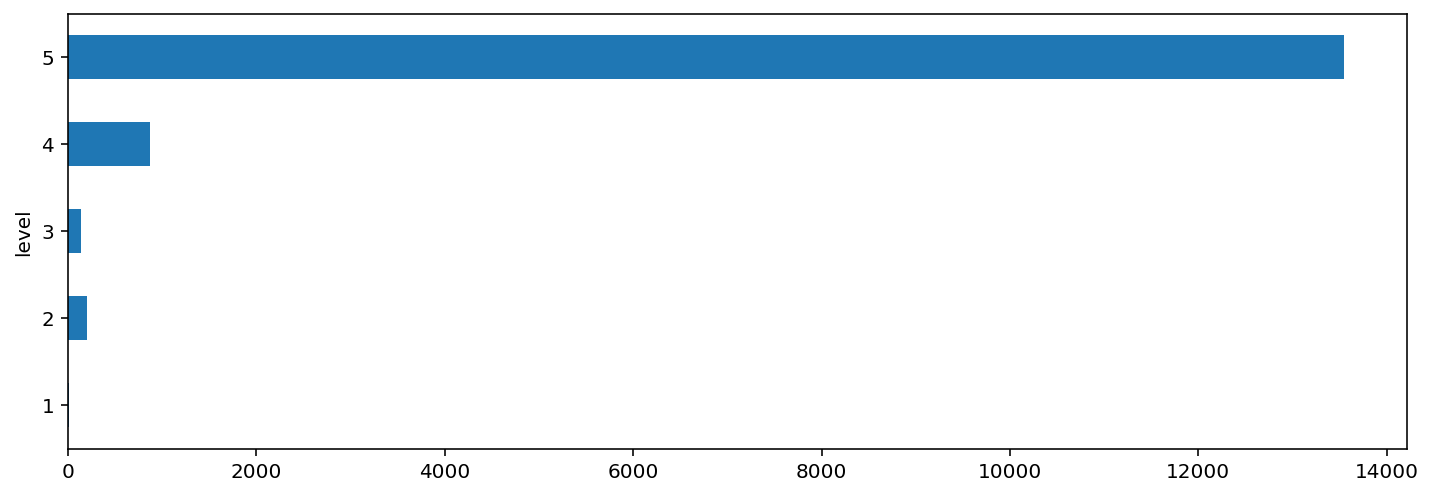

In [74]:
# распределение всех строк по уровням
df.groupby('level').count()['id'].plot.barh()

<AxesSubplot:ylabel='level'>

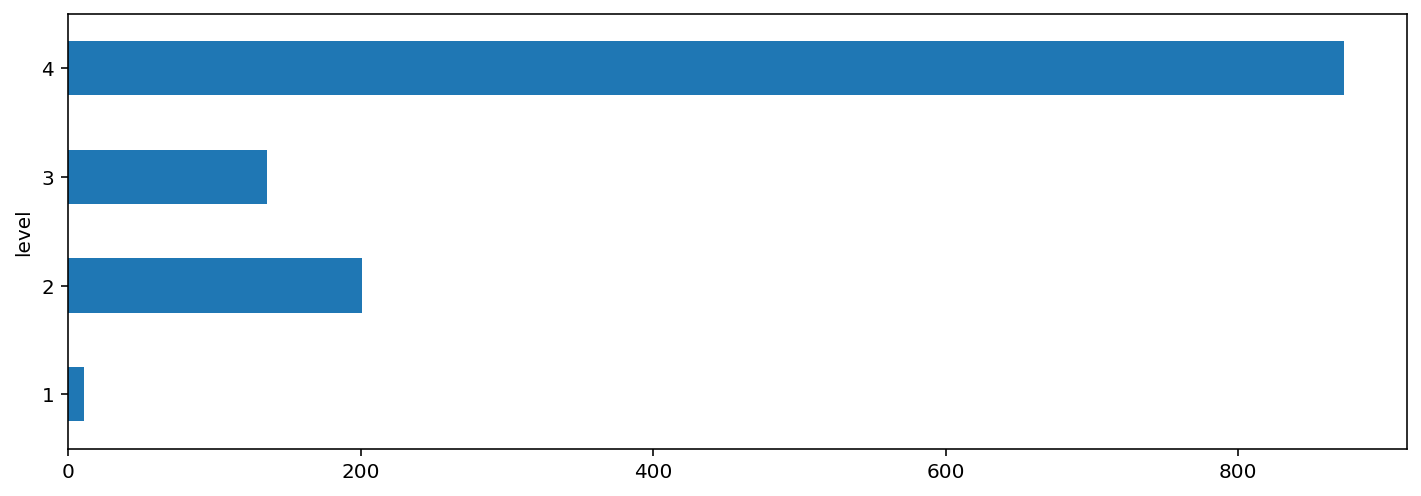

In [75]:
# распределение заголовков по уровням
df[df['level'] <= maxlevel].groupby('level').count()['id'].plot.barh()

-----

# Замена 

## Кейс 1: Заголовки в треугольных скобках

Чисто эмпирически я выяснила, что есть заголовки, которые заключены в киноварные угловые скобки <>.

In [8]:
with open(file, 'r') as o:
    o = o.read()

In [161]:
# поиск по файлу целиком, паттерн "перенос + '< П' + любые символы" (иногда бывает "песнь" без диакритического знака) + >"
stray = re.findall('\n< П.*>', o) 
stray

['\n< Пе́снь 7>',
 '\n< Пе́снь 1>',
 '\n< Пе́снь 3>',
 '\n< Пе́снь 6>',
 '\n< Пе́снь 7>',
 '\n< Пе́снь 8>',
 '\n< Пе́снь 3>']

Песни у нас обычно относятся к 4 уровню.

In [151]:
# придумываем метод преобразования и сборки строки
new = stray[0].replace('<', '====').replace('>', '')
print('Оригинал:', stray[0])
print('Замена:', new)

Оригинал: 
< Пе́снь 7>
Замена: 
==== Пе́снь 7


In [152]:
# заменяем значения
y = o # копия полного текста
for s in stray:
    new = stray[0].replace('<', '====').replace('>', '')
    y = y.replace(s, new)

In [153]:
re.findall('\n< П.*>', y) 

[]

In [154]:
# экспорт результатов
with open(output, 'w') as s:
    s.write(y)

## Кейс 2: Неверный уровень

У заголовков одного типа выставлен неверный уровень. 2 уровень в Октоихе обычно относится к дням недели, а конкретная служба (по времени дня) помечается как 3 уровень. Службы обычно называются "В(о) %день недели% ...".

In [17]:
with open(file, 'r') as o:
    o = o.read()

In [15]:
wronglevel = re.findall('\n== Во?\s.*\n', o)
wronglevel[:10]

['\n== Во вто́рник ве́чера\n',
 '\n== Во вто́рник на повече́рии\n',
 '\n== В сре́ду у́тра\n',
 '\n== В сре́ду блаже́нны, гла́с 5:\n',
 '\n== В сре́ду ве́чера\n',
 '\n== В сре́ду на повече́рии\n',
 '\n== В четверто́к у́тра\n',
 '\n== В четверто́к блаже́нны, гла́с 5:\n',
 '\n== В четверто́к ве́чера\n',
 '\n== В четверто́к на повече́рии\n']

Эти заголовки должны быть на 3 уровне. Нам надо аккуратно прибавить один '=', не меняя остального.

In [16]:
wronglevel[-1].split() # для доступа к '==' можно разбить строку по пробелам

['==', 'В', 'суббо́ту', 'на', 'литурги́и', 'блаже́нна,', 'гла́с', '8:']

In [143]:
# придумываем метод преобразования и сборки строки
newval = '\n'+ wronglevel[-1].split()[0]+'= '+ ' '.join(wronglevel[-1].split()[1:]) + '\n'
print('Оригинал:', wronglevel[-1])
print('Замена:', newval)

Оригинал: 
== В суббо́ту на литурги́и блаже́нна, гла́с 8:

Замена: 
=== В суббо́ту на литурги́и блаже́нна, гла́с 8:



In [144]:
# тест на списке целиком
['\n'+ w.split()[0]+'= '+ ' '.join(w.split()[1:]) + '\n' for w in wronglevel][:10]

['\n=== Во вто́рник ве́чера\n',
 '\n=== Во вто́рник на повече́рии\n',
 '\n=== В сре́ду у́тра\n',
 '\n=== В сре́ду блаже́нны, гла́с 5:\n',
 '\n=== В сре́ду ве́чера\n',
 '\n=== В сре́ду на повече́рии\n',
 '\n=== В четверто́к у́тра\n',
 '\n=== В четверто́к блаже́нны, гла́с 5:\n',
 '\n=== В четверто́к ве́чера\n',
 '\n=== В четверто́к на повече́рии\n']

In [145]:
# тест на фрагменте
st = '\n'.join(l[9700:9717])

x1 = st
for w in wronglevel:
    newval = '\n'+ w.split()[0]+'= '+ ' '.join(w.split()[1:]) + '\n'
    x1 = x1.replace(w, newval)
    
print(st, '-----------')
print(x1)

<Та́же, Бла́го е́сть испове́датися Го́сподеви:> Трисвято́е. <И по> О́тче на́ш: <тропа́рь, и ектениа́. Та́же, ча́с 1-й: и псалмы́ обы́чныя, и про́чее, и отпу́ст.>

== В понеде́льник блаже́нны, гла́с 6:

Помяни́ мя, Бо́же Спа́се мо́й, егда́ прии́деши во Ца́рствии Твое́м: и спаси́ мя я́ко еди́н Человеколю́бец.

<Сти́х:> Блаже́ни изгна́ни пра́вды ра́ди, я́ко те́х е́сть Ца́рство Небе́сное.

Пре́зри я́же в ве́дении и не в ве́дении соде́янная моя́, Иису́се Человеколю́бче, и спаса́емых ча́сти сподо́би мя́.

<Сти́х:> Блаже́ни есте́, егда́ поно́сят ва́м, и изжену́т и реку́т вся́к зо́л глаго́л, на вы́ лжу́ще Мене́ ра́ди.

Просвети́вый а́нгельския ли́ки, те́х мольба́ми, Христе́, зра́к се́рдца моего́ просвети́.

<Сти́х:> Ра́дуйтеся и весели́теся, я́ко мзда́ ва́ша мно́га на Небесе́х.

Вся́ко искуше́ние ра́н подъе́мше, страстоно́сцы, ра́ны и стру́пы челове́ком ве́рующым при́сно исцеля́ете.

<Сла́ва:> Тро́ице Святе́й поклони́мся, пое́мей а́нгельскими во́инствы, то́й вопию́ще: спаси́ ду́шы на́шя.

<И н

In [156]:
# заменяем значения
x = o # копия полного текста
for w in wronglevel:
    newval = '\n'+ w.split()[0]+'= '+ ' '.join(w.split()[1:]) + '\n'
    x = x.replace(w, newval)

In [157]:
re.findall('\n== Во?\s.*\n', x)

[]

In [148]:
# экспорт результатов
with open(output, 'w') as s:
    s.write(x)

## Кейс 3: Меняем `=` на `#`

In [56]:
with open(file, 'r') as o:
    o = o.read()

Сначала избавляемся от лишних знаков после заголовка.

In [57]:
wrongmd = re.findall('\n?=+[^=].*=+\n', o)
print('Количество:', len(wrongmd))

Количество: 865


In [58]:
wrongmd[:10]

['\n==== Пе́снь 5 ====\n',
 '\n==== Пе́снь 6 ====\n',
 '\n==== Пе́снь 7 ====\n',
 '\n==== Пе́снь 8 ====\n',
 '\n==== Пе́снь 9 ====\n',
 '\n==== Пе́снь 1 ====\n',
 '\n==== Пе́снь 3 ====\n',
 '\n==== Пе́снь 4 ====\n',
 '\n==== Пе́снь 5 ====\n',
 '\n==== Пе́снь 6 ====\n']

In [32]:
# ищем способ преобразрвания
'\n' + wrongmd[0].strip().rstrip('=').strip() +'\n'

'\n==== Пе́снь 5\n'

In [59]:
a = o # копия полного текста
for w in wrongmd:
    newval = '\n' + wrongmd[0].strip().rstrip('=').strip() +'\n'
    a = a.replace(w, newval)

In [60]:
wrongmd = re.findall('\n?=+[^=].*=+\n', a)
print('Количество:', len(wrongmd))

Количество: 0


Теперь механически заменяем 

In [61]:
a = a.replace('=', '#')

In [63]:
a[:1000]

'# Уставные главы\n## Чин малыя вечерни\nПрежде солнечнаго захождения дне субботнаго, приходит параекклисиарх [сиречь кандиловжигатель] к предстоятелю, и творит поклонение ему, знаменуя пришествием своим время клепания. И взем благословение, изшед клеплет в малый кампан.\nИ собравшимся братиям в притвор, творит священник начало: Благословен Бог наш:\nИ учиненный чтец глаголет: Слава тебе Боже наш, слава Тебе.\n<Таже>, Царю Небесный: Трисвятое: И по Отче наш:\nВозглас от священника, и чтет чтец 9-й час по обычаю.\n<Таже>, по конце того и по отпусте входим в храм: и станет кийждо на своем месте.\nАще же 9-й час глаголется в храме, тогда отпуст 9-го часа не бывает, но абие иерей начинает, глаголя: Благословен Бог наш:\nИ чтец глаголет: Приидите поклонимся: трижды, и вечерний псалом: Благослови душе моя Господа: тихо и кротким гласом. По псалме же, <Слава, и ныне>, аллилуиа, трижды.\nИерей же ектении не глаголет, но чтец глаголет: Господи помилуй, трижды.\n<Слава, и ныне>:\nИ абие, Господи

In [64]:
re.findall('\n?=+[^=].*\n', a)

[]

In [65]:
# экспорт результатов
with open(output, 'w') as s:
    s.write(a)